Random starting synaptic weights: 
[[-8.29779953]
 [22.03244934]]


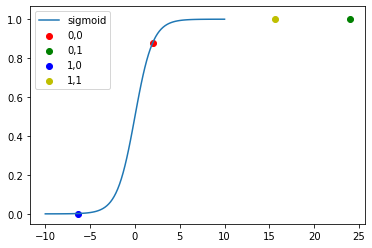

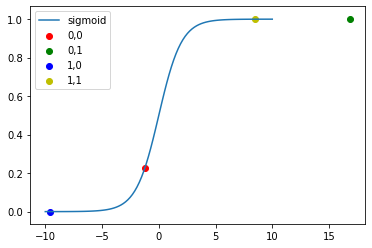

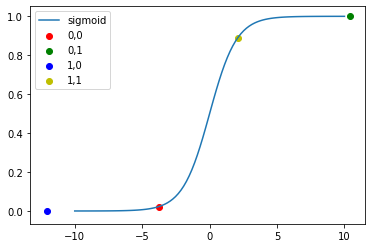

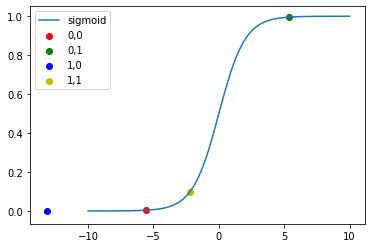

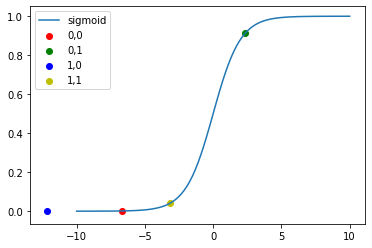

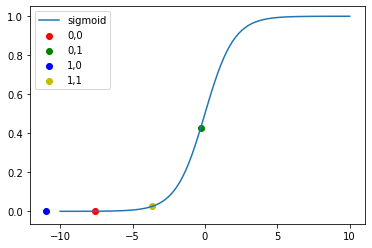

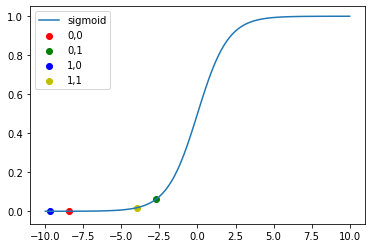

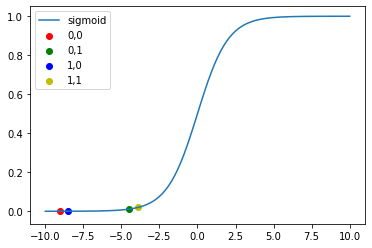

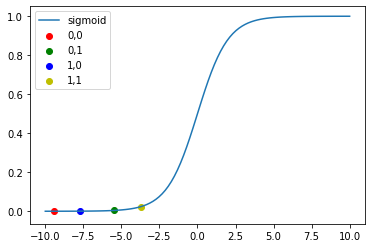

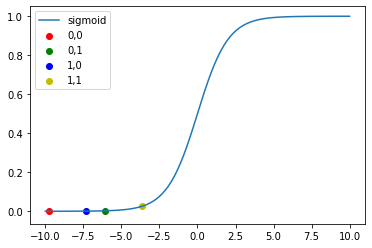

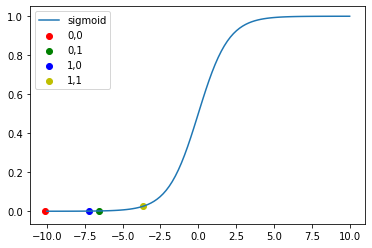

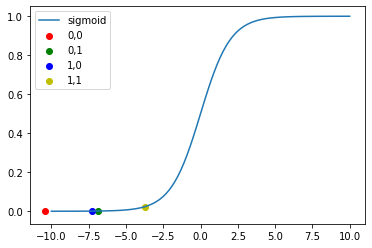

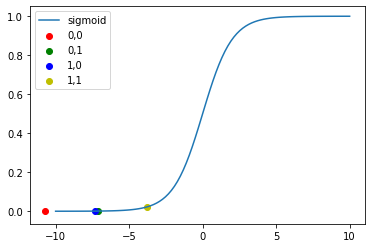

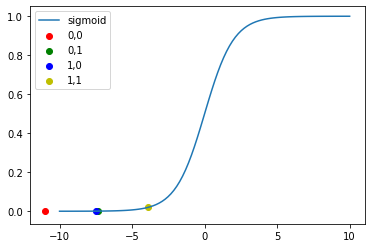

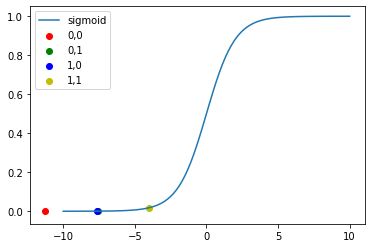

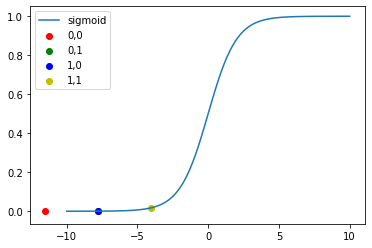

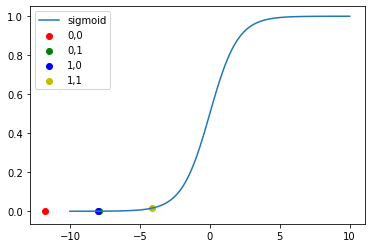

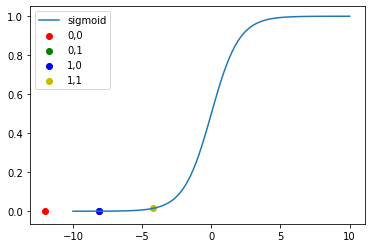

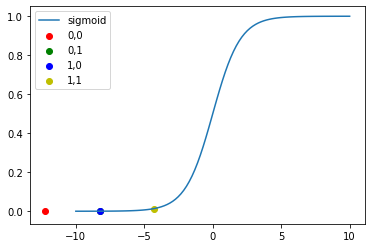

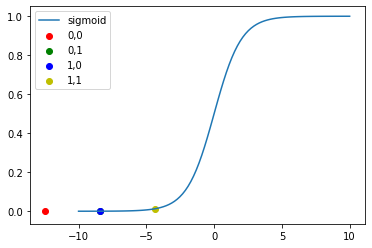

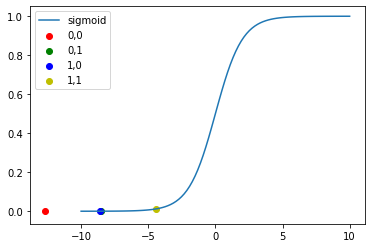

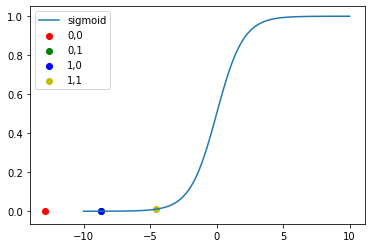

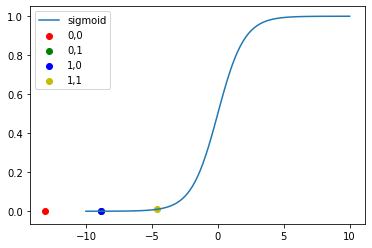

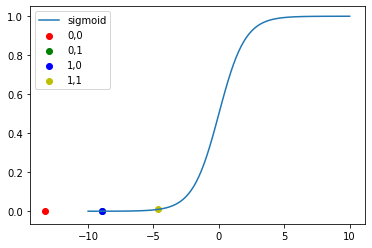

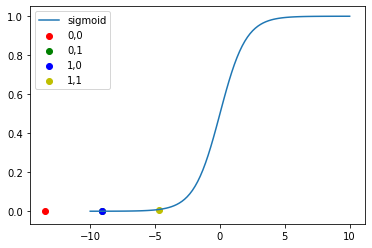

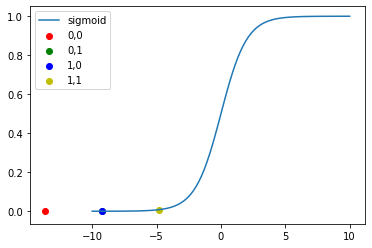

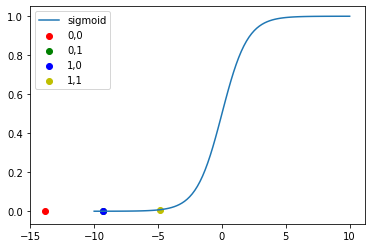

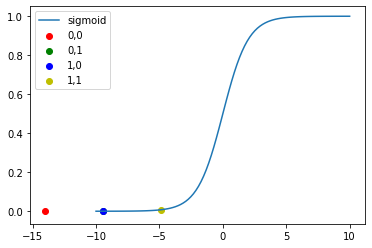

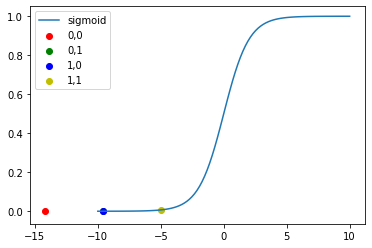

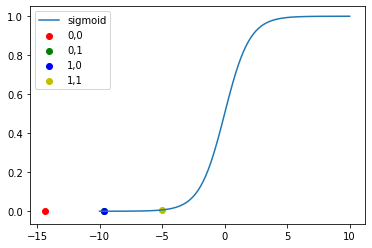

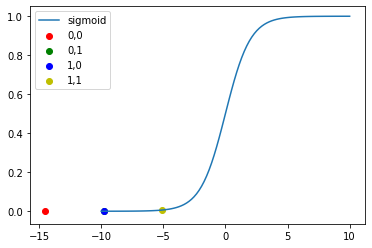

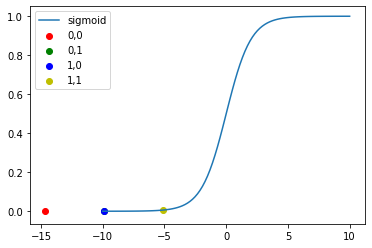

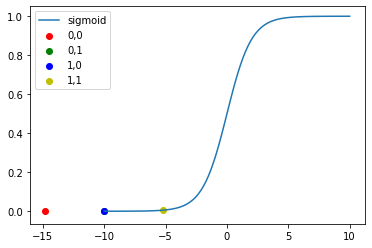

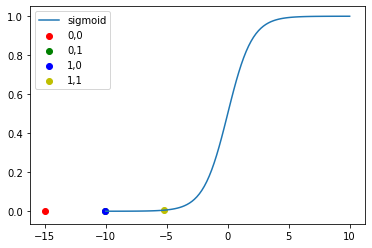

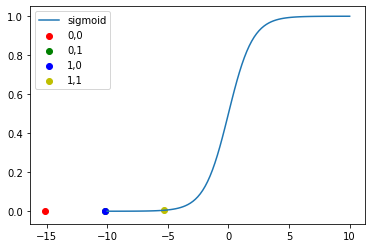

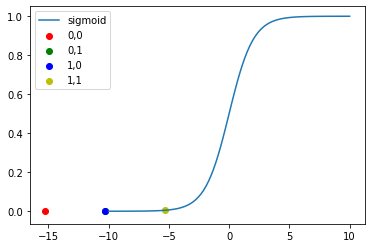

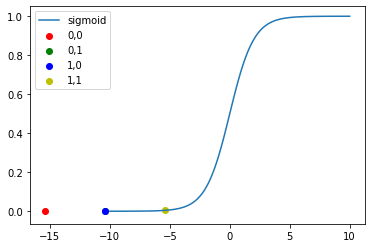

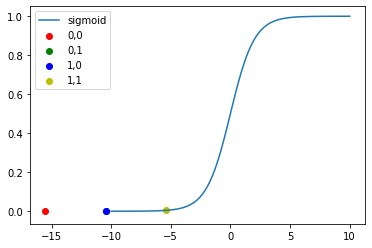

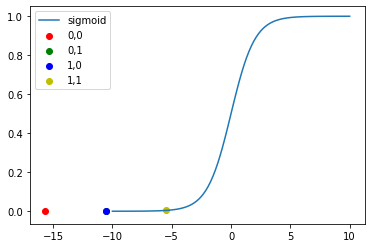

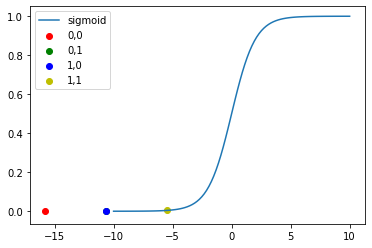

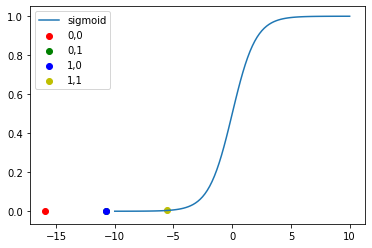

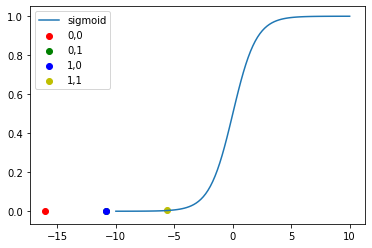

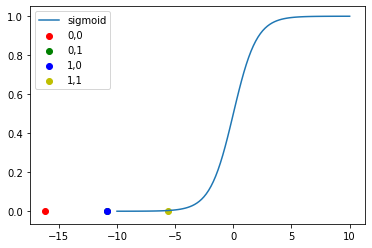

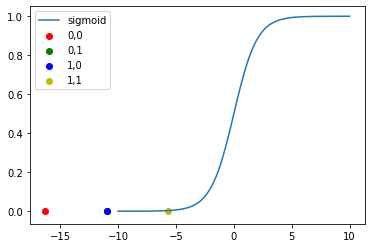

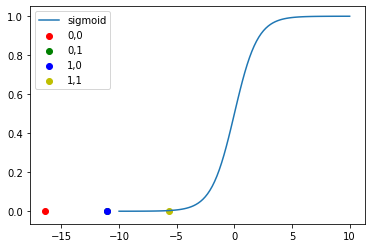

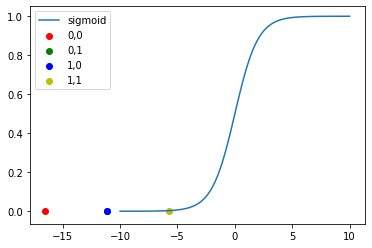

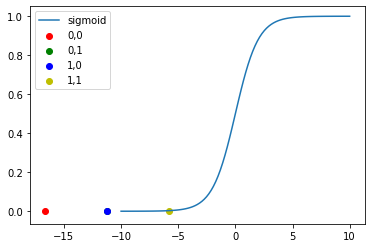

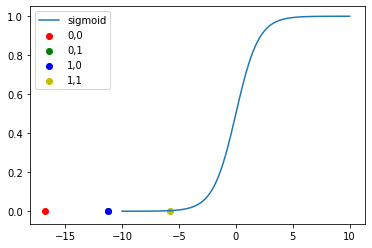

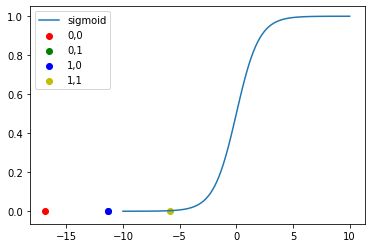

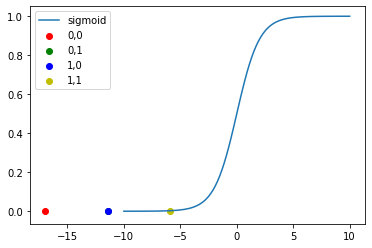

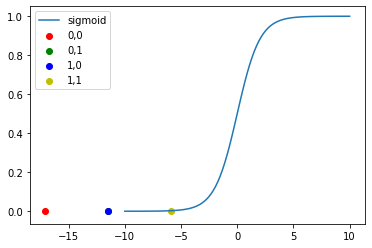

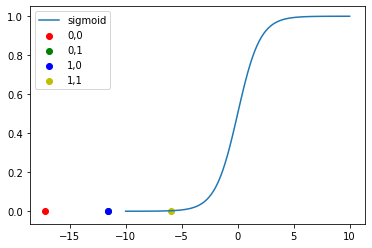

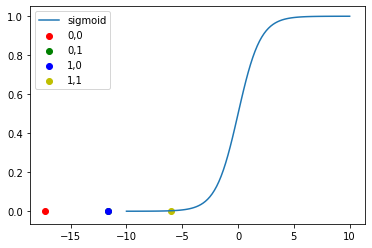

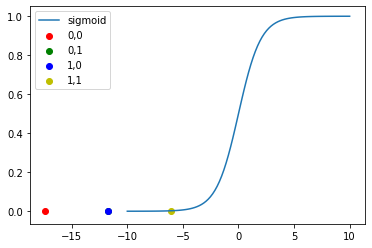

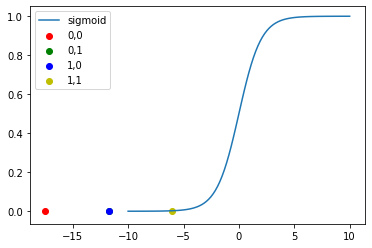

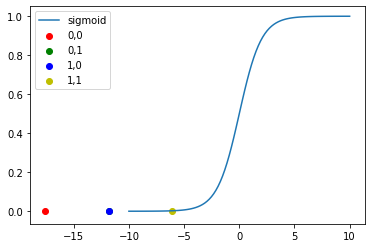

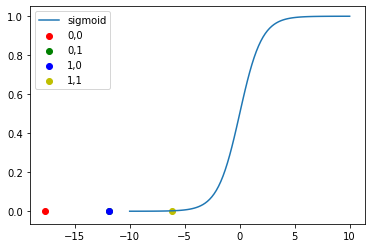

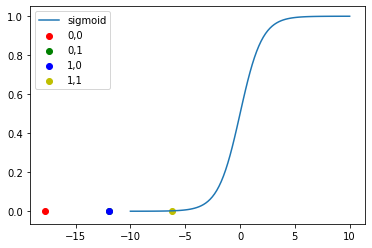

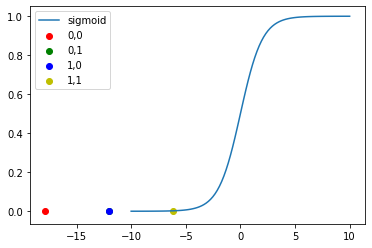

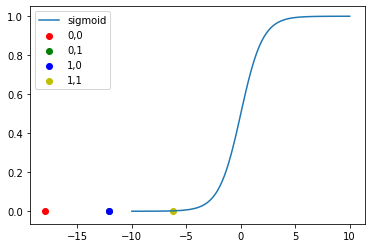

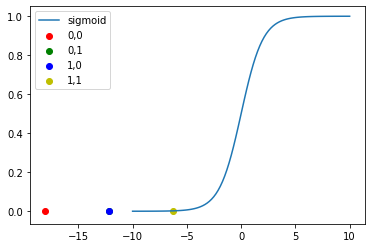

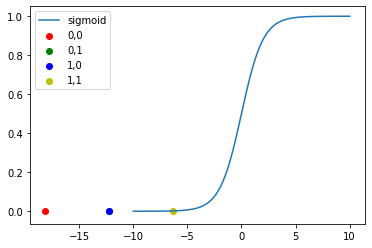

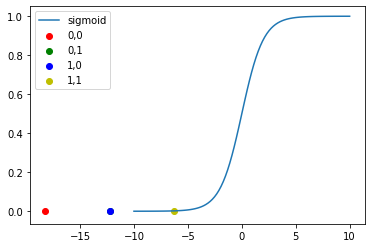

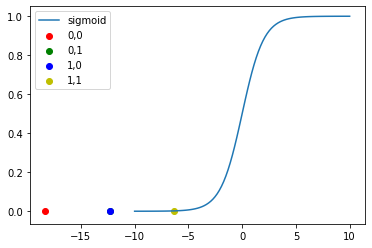

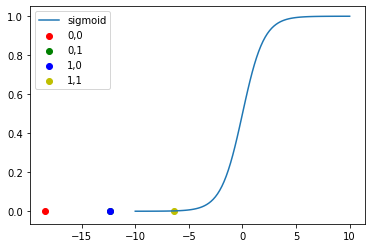

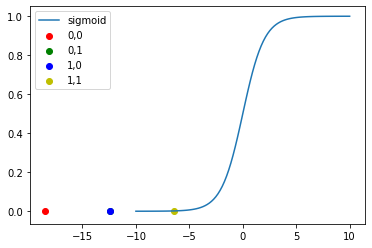

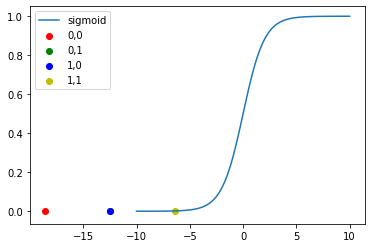

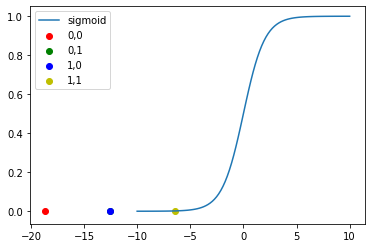

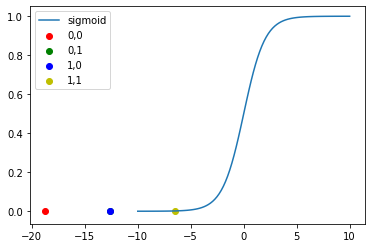

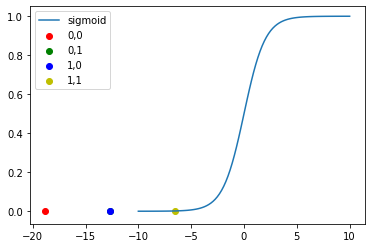

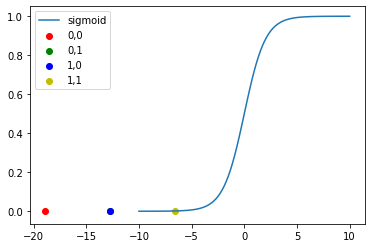

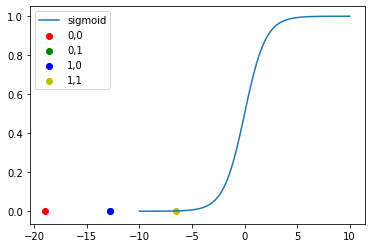

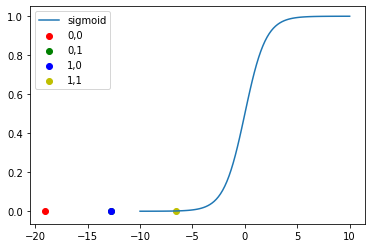

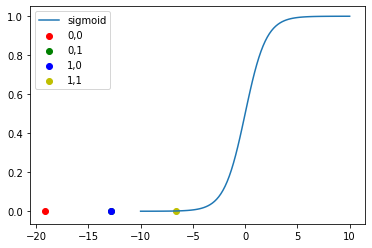

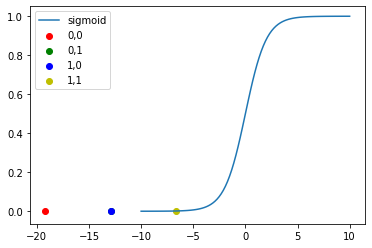

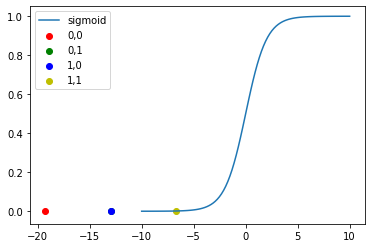

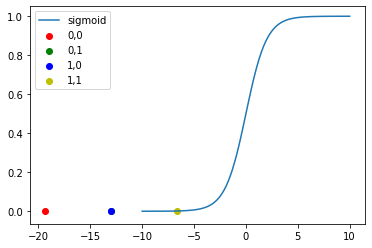

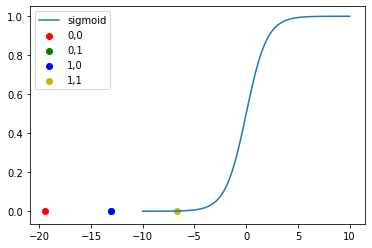

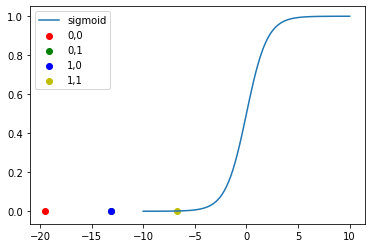

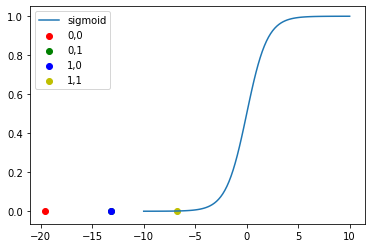

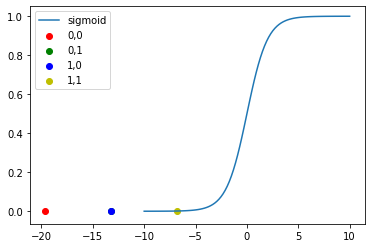

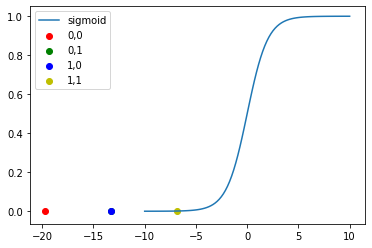

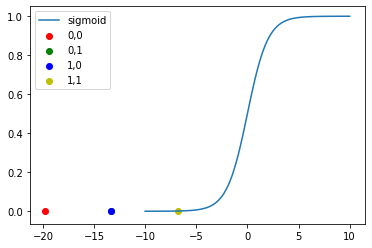

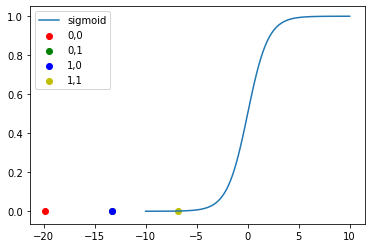

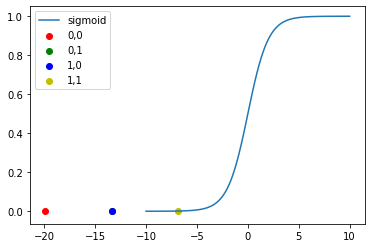

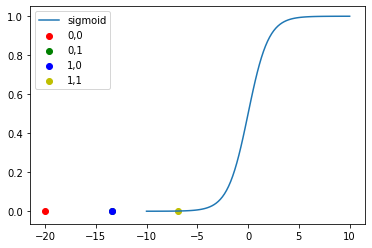

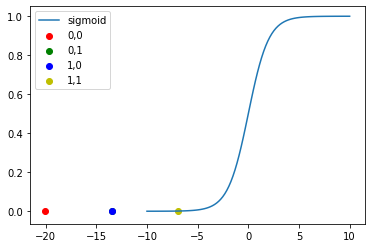

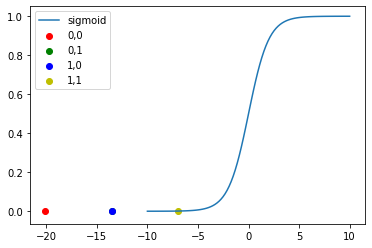

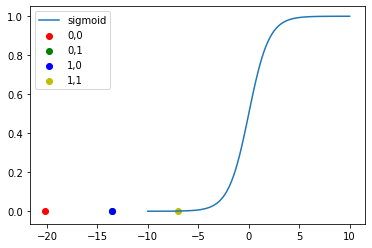

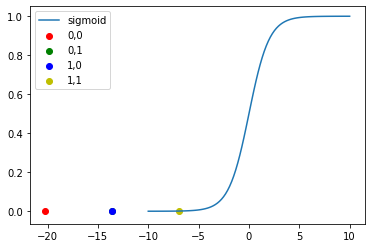

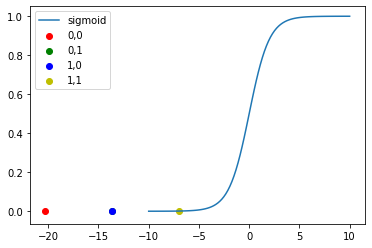

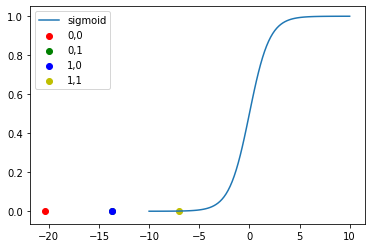

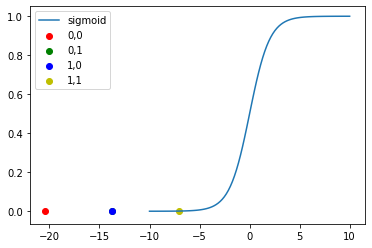

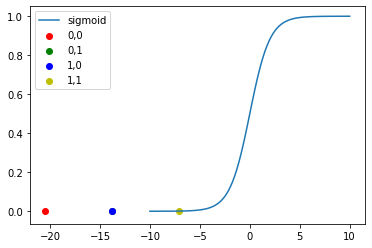

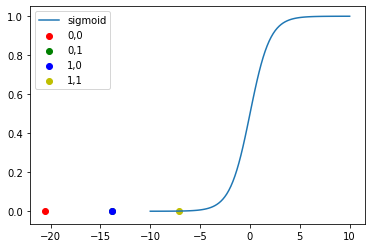

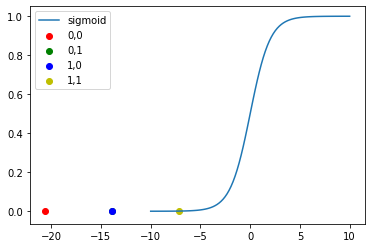

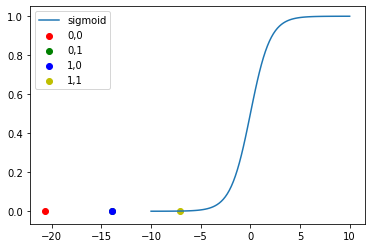

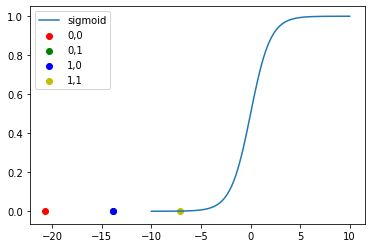

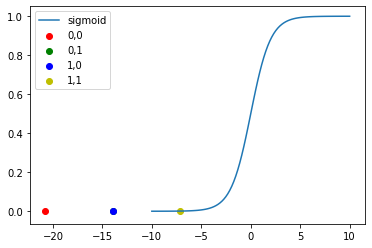

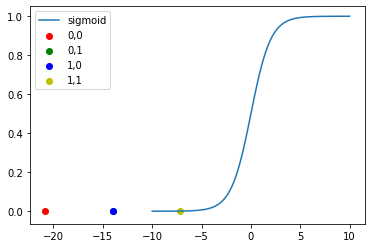

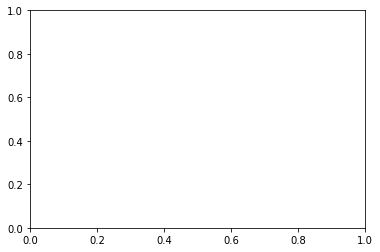

In [77]:
import matplotlib.pyplot as plt
import time
import numpy as np

x = np.linspace(-10,10,100)
# sigmoid function to normalize inputs
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return np.exp(-x)/((1+np.exp(-x))**2)
    
# input dataset
training_inputs = np.array([[0,0],
                            [0,1],
                            [1,0],
                            [1,1]])

# output dataset
training_outputs = np.array([[0,0,0,1]]).T

# seed random numbers to make calculation
np.random.seed(1)

# initialize weights randomly with mean 0 to create weight matrix, synaptic weights
synaptic_weights = 100 * np.random.random((2,1)) - 50

print('Random starting synaptic weights: ')
print(synaptic_weights)

# Iterate 10,000 times
loss = []
acc = []
bias = 1
for iteration in range(10000):

    # Define input layer
    input_layer = training_inputs
    # Normalize the product of the input layer with the synaptic weights
    z = sigmoid(np.dot(input_layer, synaptic_weights[:input_layer.shape[1]])+bias)

    # how much did we miss?
    #error = training_outputs - outputs
    error = 2*(training_outputs - z)*(-1)
    loss.append(abs(error).mean()*5)
    # multiply how much we missed by the
    # slope of the sigmoid at the values in outputs
    adjustments = error * sigmoid_derivative(z)*0.1

    # update weights
    synaptic_weights = synaptic_weights - np.dot(input_layer.T, adjustments)
    bias = bias - np.mean(adjustments)
    
    acc.append(sum((z>0.5)*1 == training_outputs)/len(training_outputs)) 
    
    x_out,y_out = sum((input_layer*synaptic_weights.T+bias).T),sigmoid( sum((input_layer*synaptic_weights.T+bias).T))
    
                                                                  
    if iteration%100 == 0:
        #plt.scatter(sum((input_layer*synaptic_weights.T).T),sigmoid( sum((input_layer*synaptic_weights.T).T) ),c='r' )
        plt.scatter(x_out[0],y_out[0],c='r' )
        plt.scatter(x_out[1],y_out[1],c='g' )
        plt.scatter(x_out[2],y_out[2],c='b' )
        plt.scatter(x_out[3],y_out[3],c='y' )
        plt.plot(x,sigmoid(x))
        plt.legend(['sigmoid','0,0','0,1','1,0','1,1'])
        #plt.savefig('trainXOR/'+str(time.time())+'.jpg')
       
        plt.show()
        plt.cla()

Synaptic weights after training: 
[[6.83616973]
 [6.83616973]]
-10.438324272056253
Output After Training:
[[2.92957275e-05]
 [2.65437264e-02]
 [2.65437264e-02]
 [9.62091005e-01]]


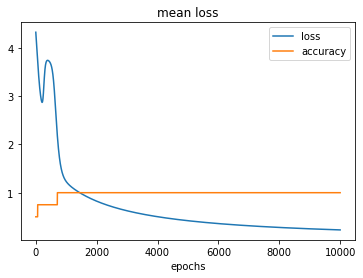

In [74]:
plt.plot(loss)
plt.plot(acc)
plt.title('mean loss')
plt.xlabel('epochs')
plt.legend(['loss','accuracy'])
#plt.savefig('trainXOR/train.jpg')

print('Synaptic weights after training: ')
print(synaptic_weights)
print(bias)

print("Output After Training:")
print(z)

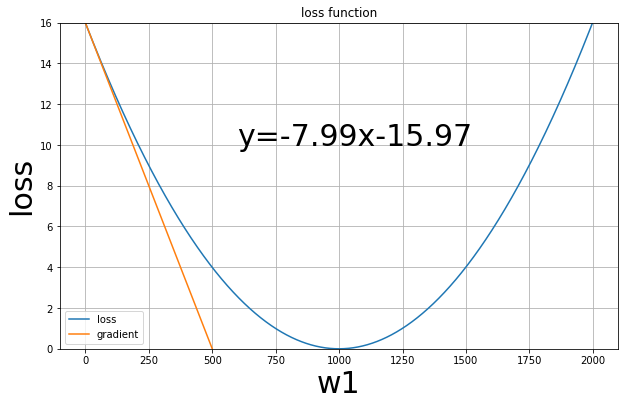

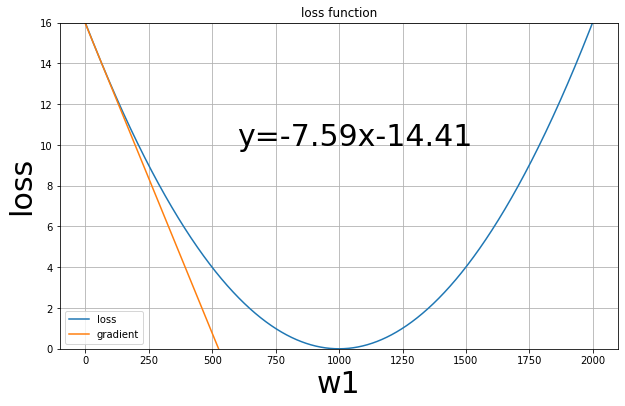

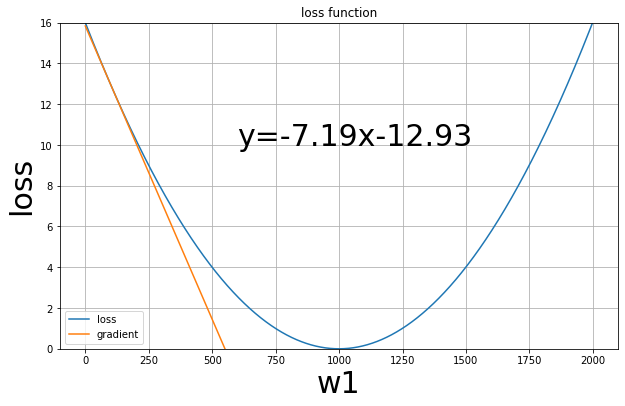

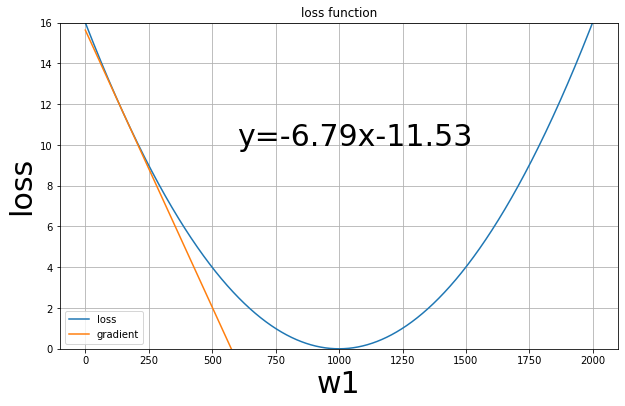

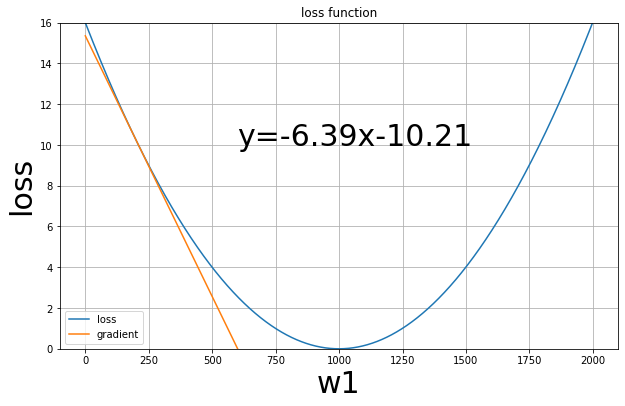

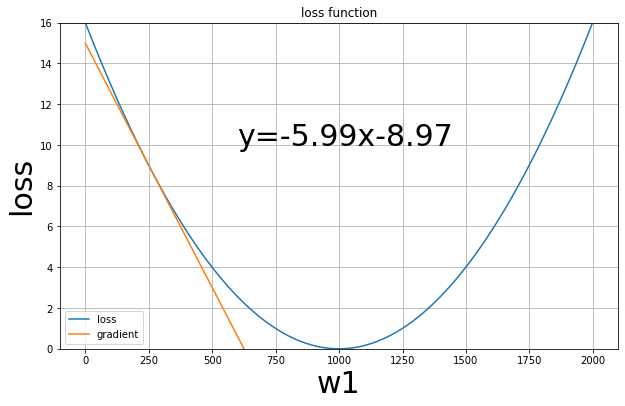

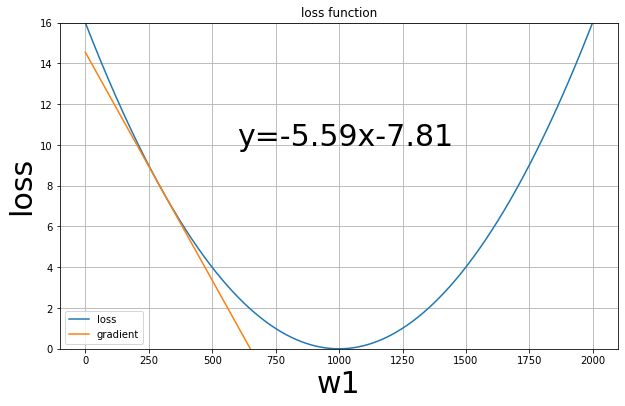

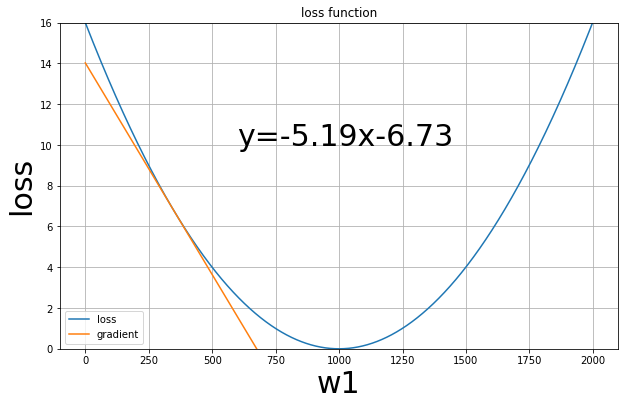

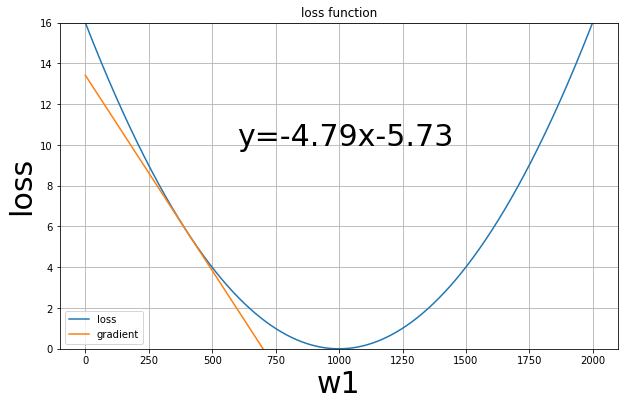

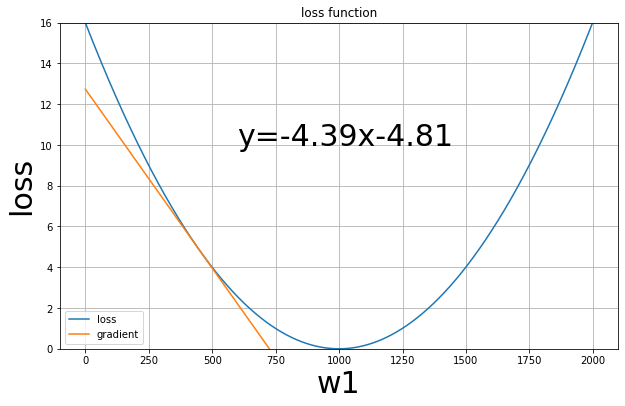

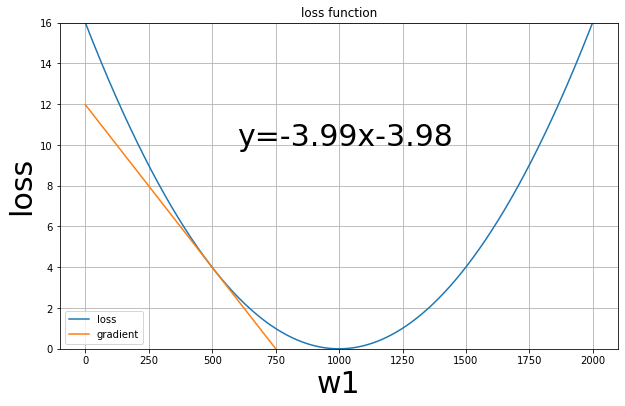

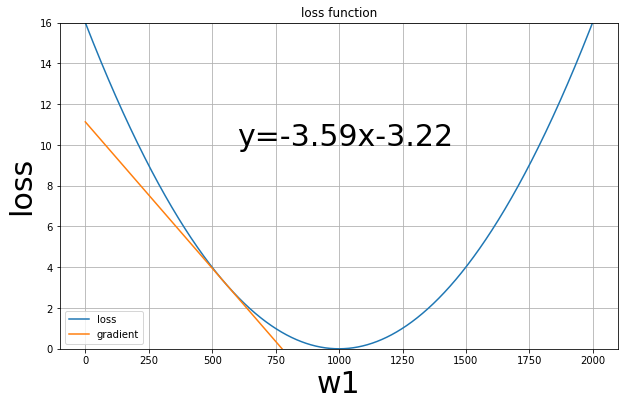

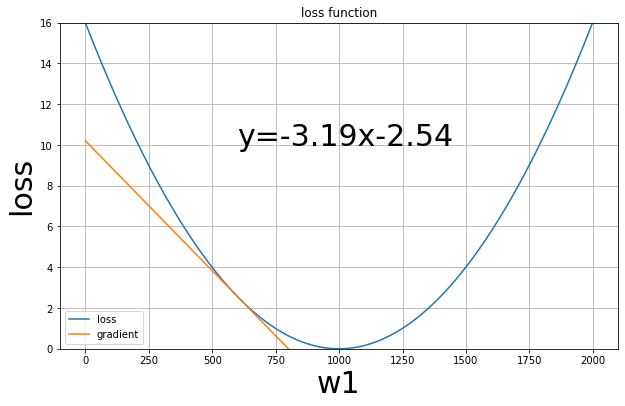

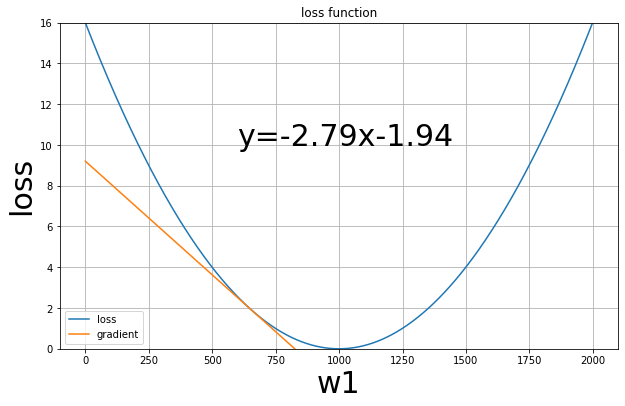

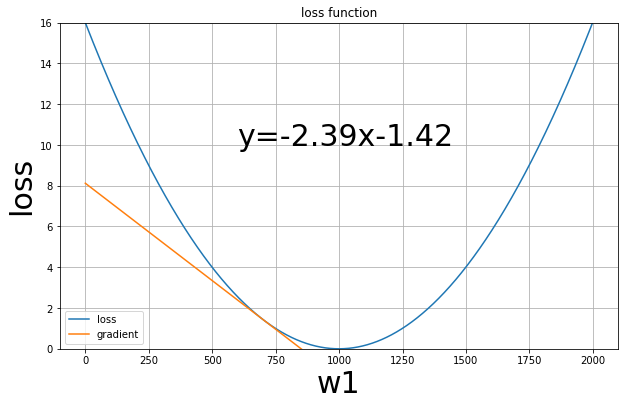

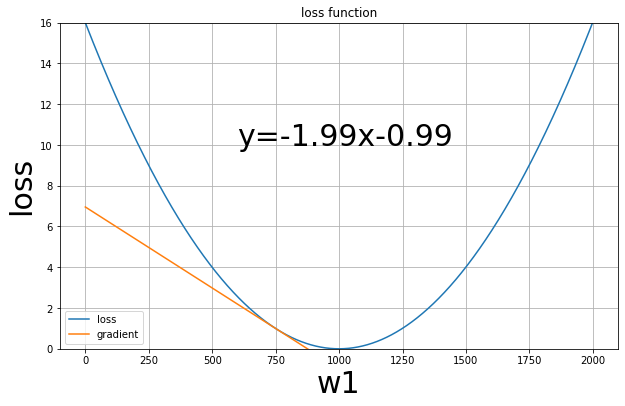

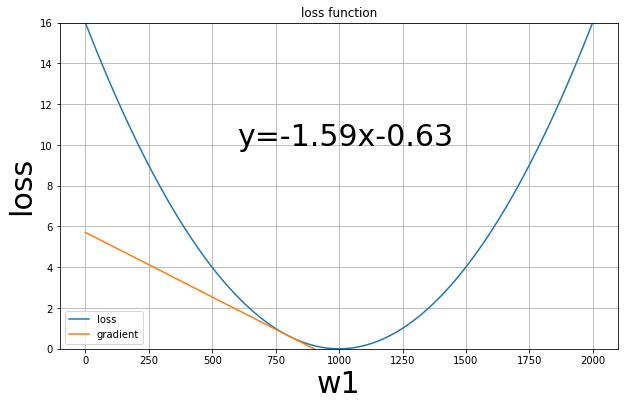

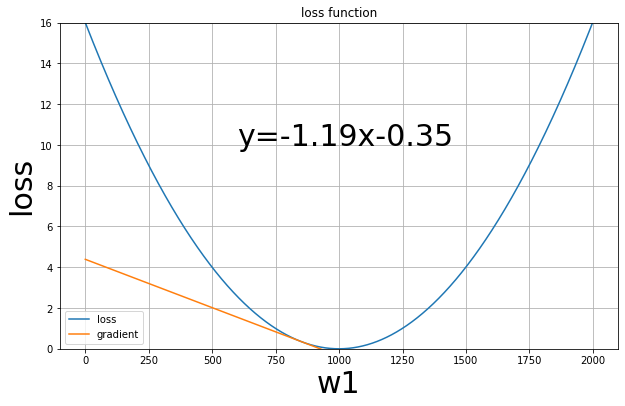

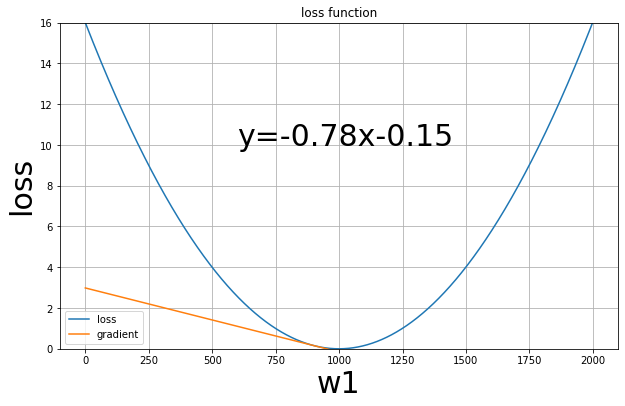

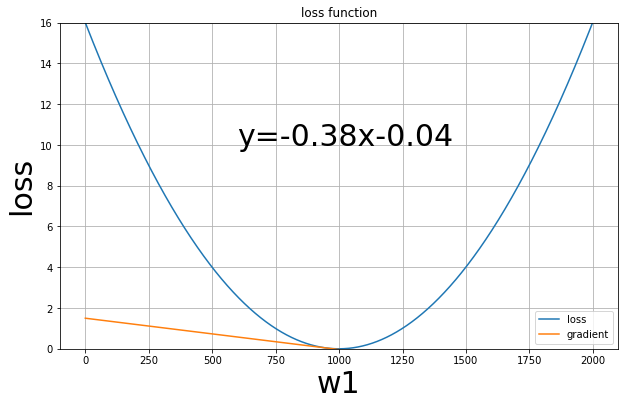

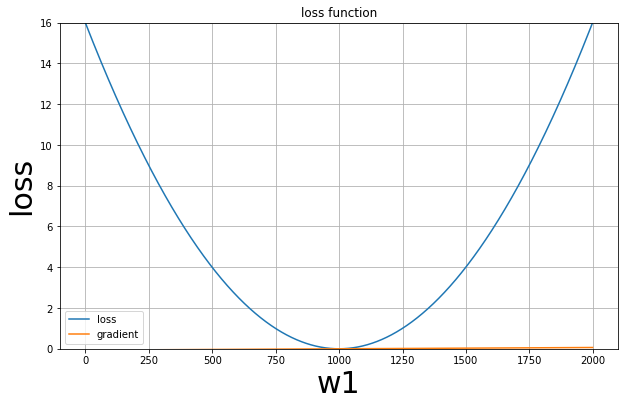

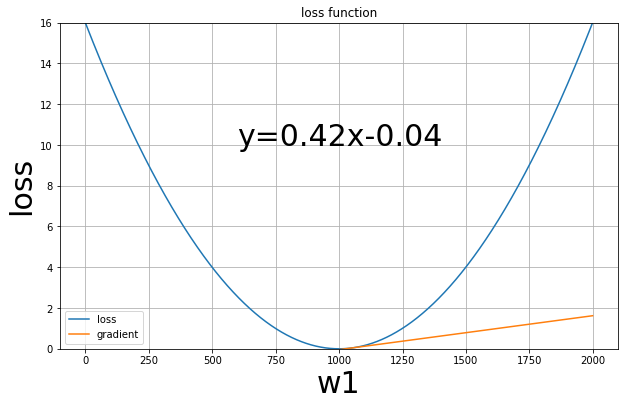

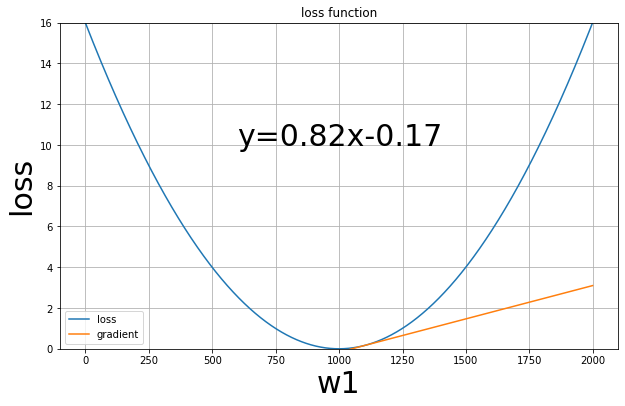

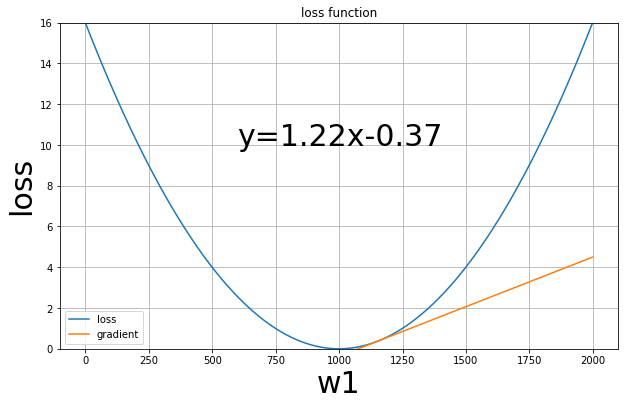

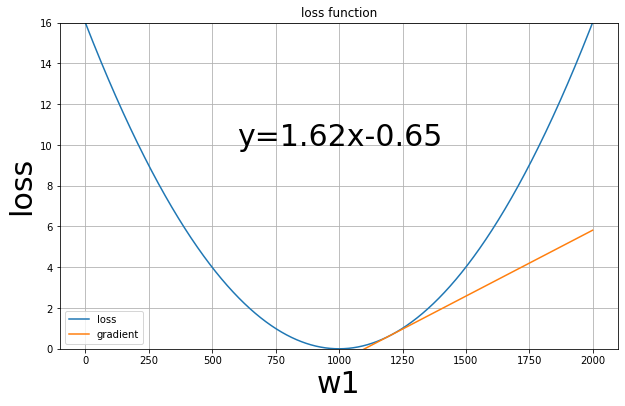

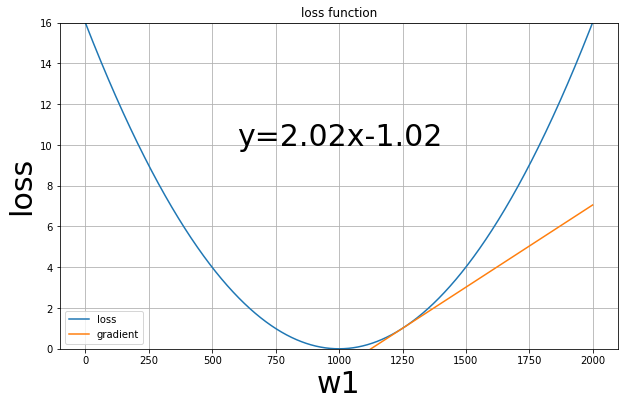

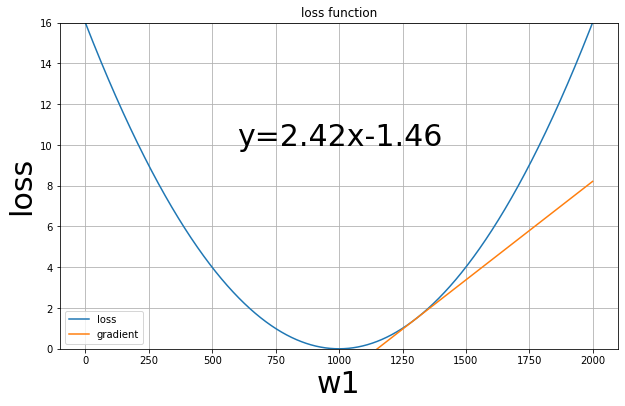

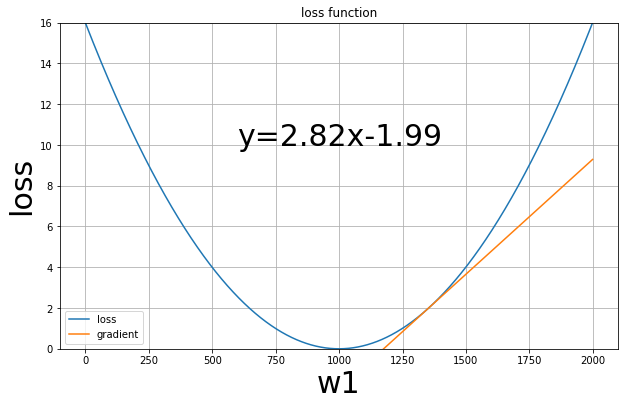

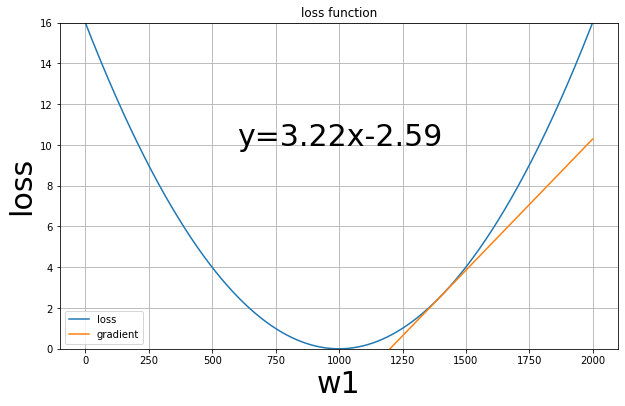

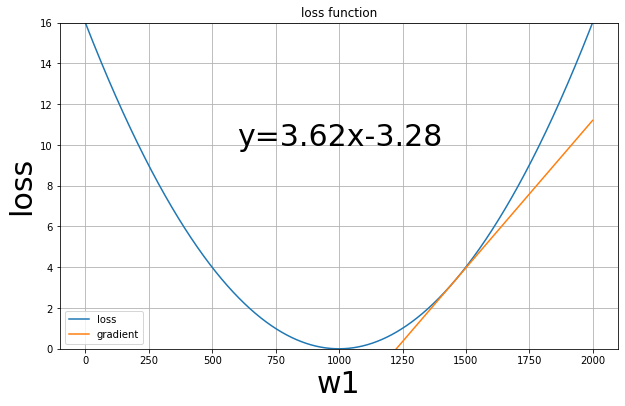

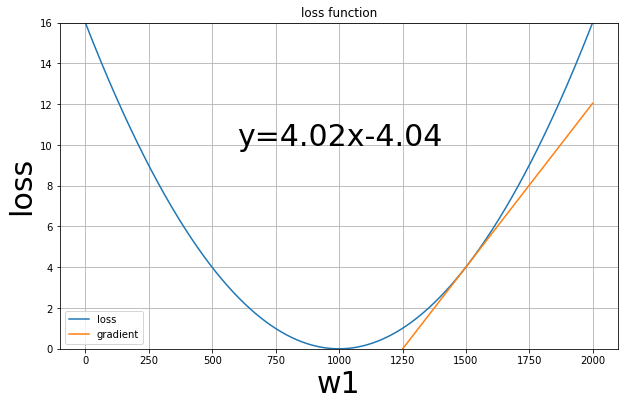

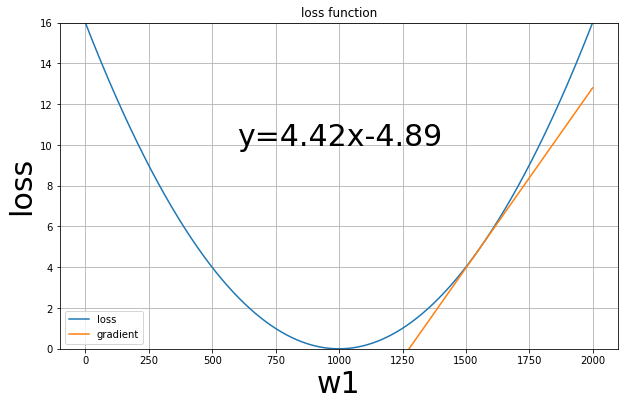

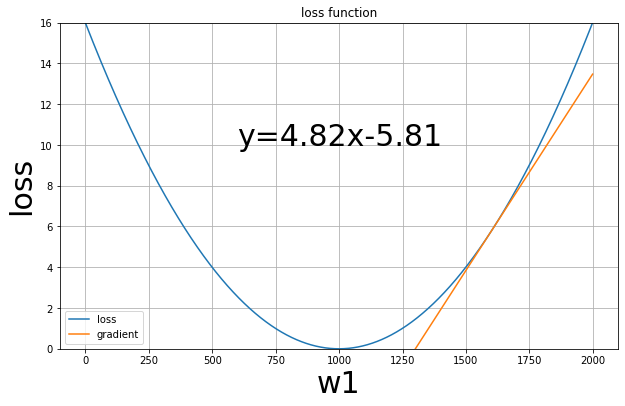

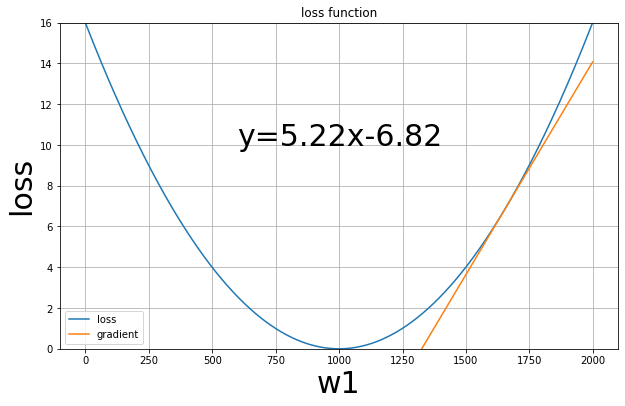

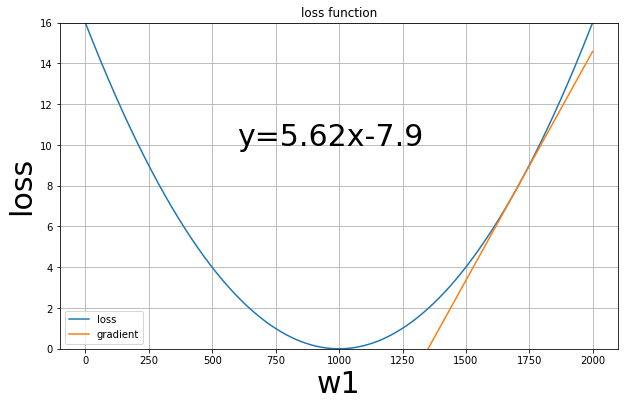

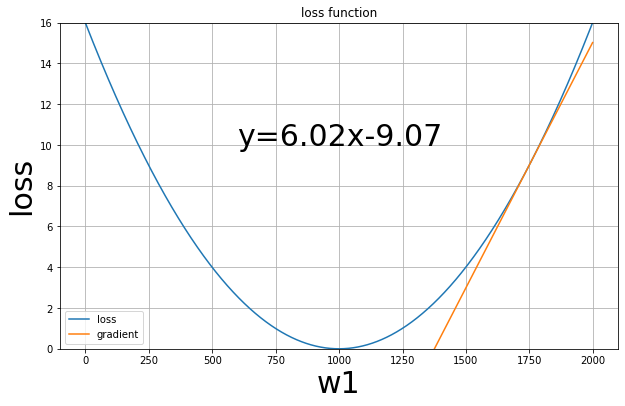

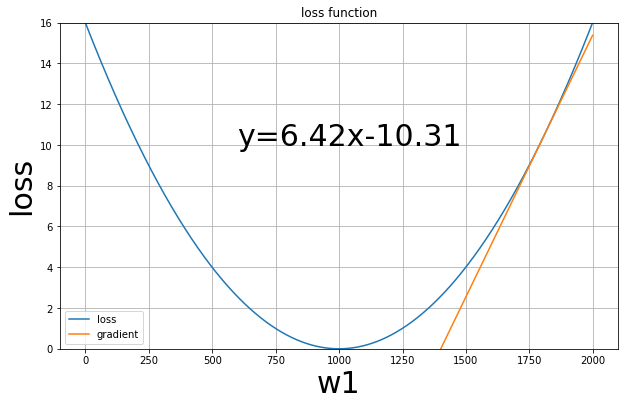

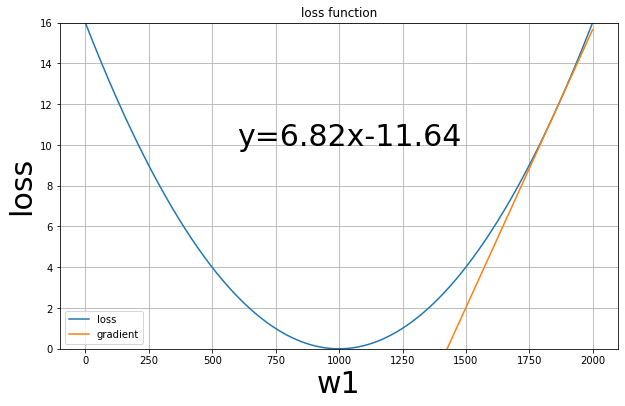

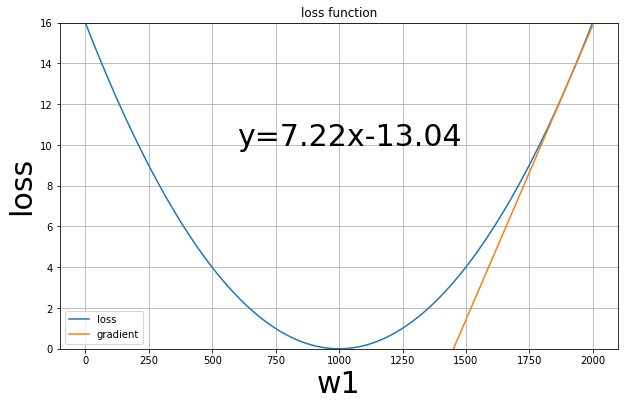

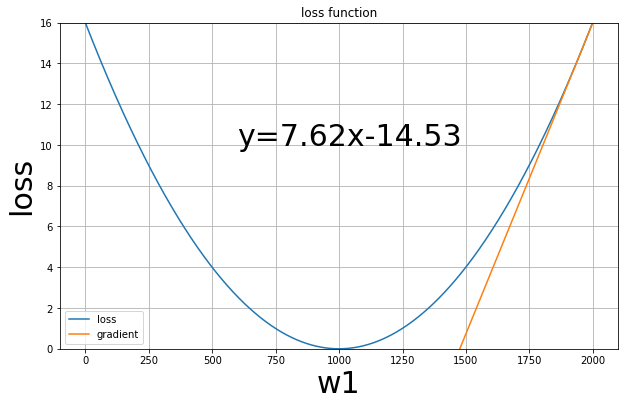

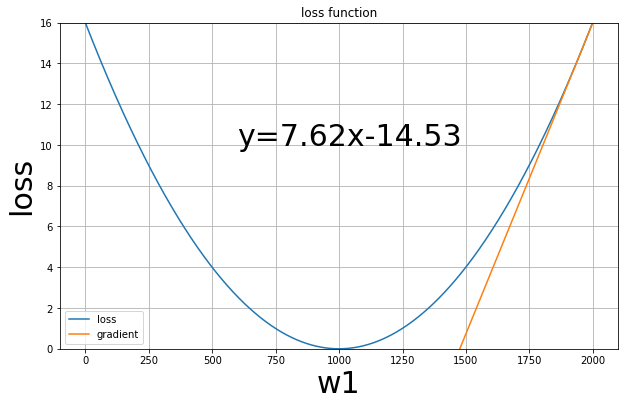

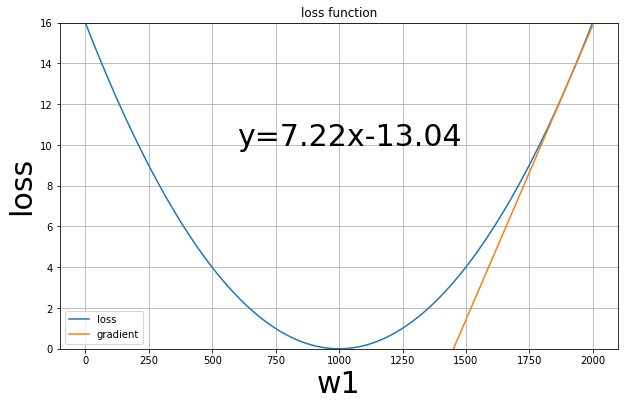

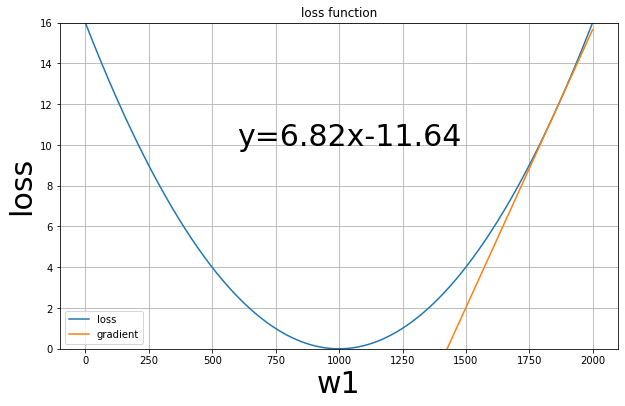

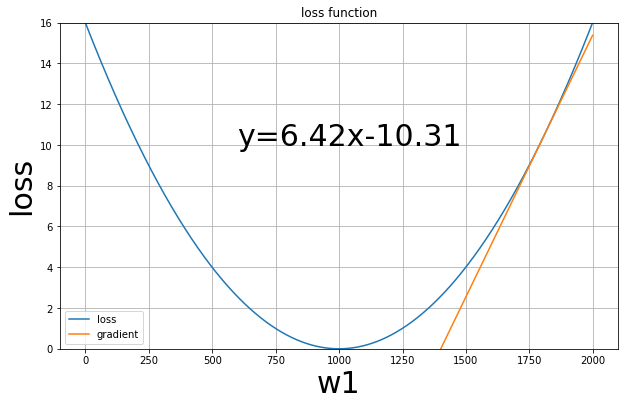

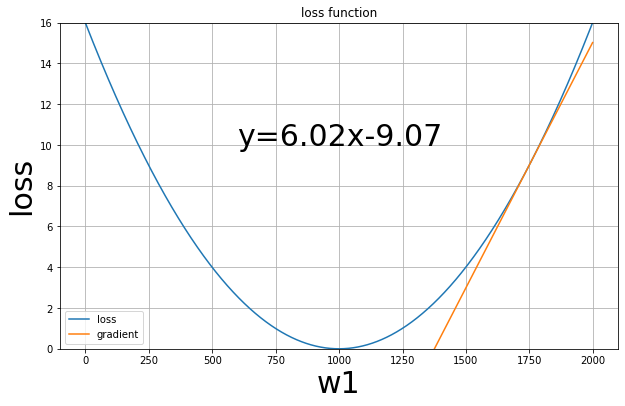

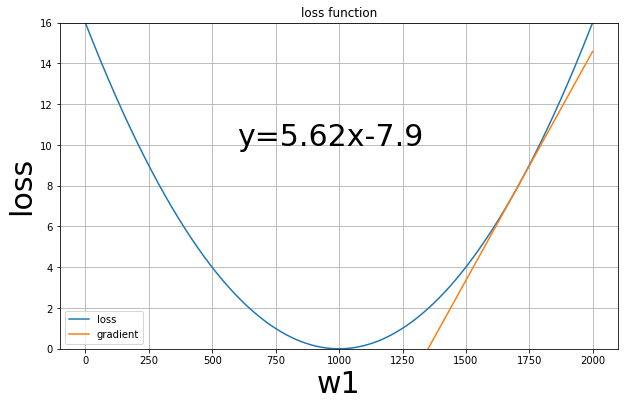

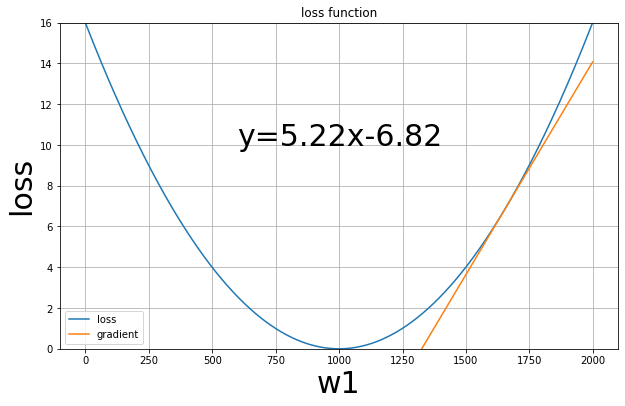

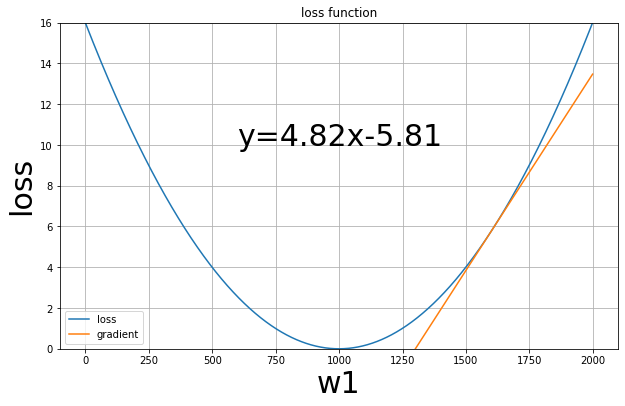

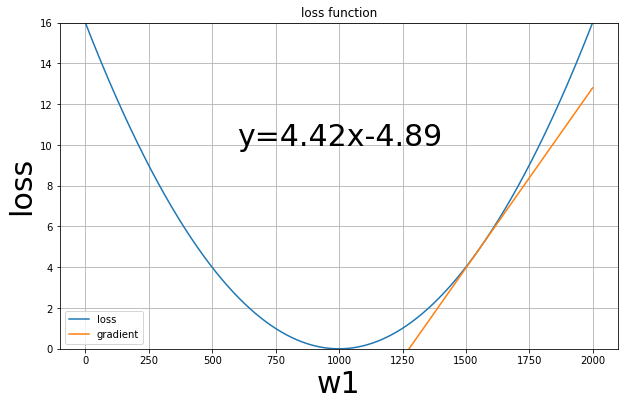

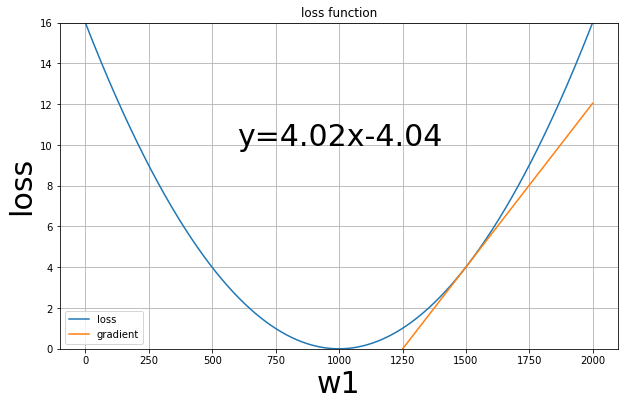

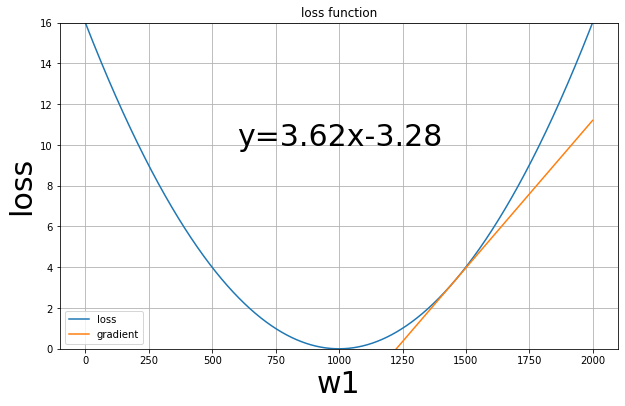

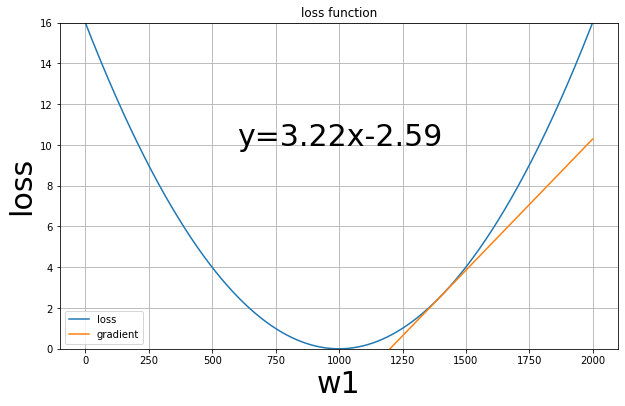

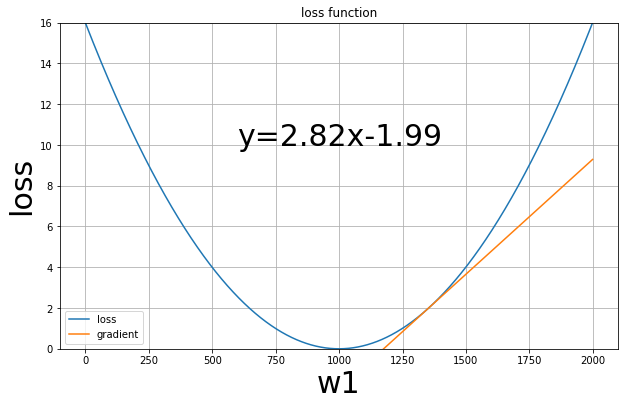

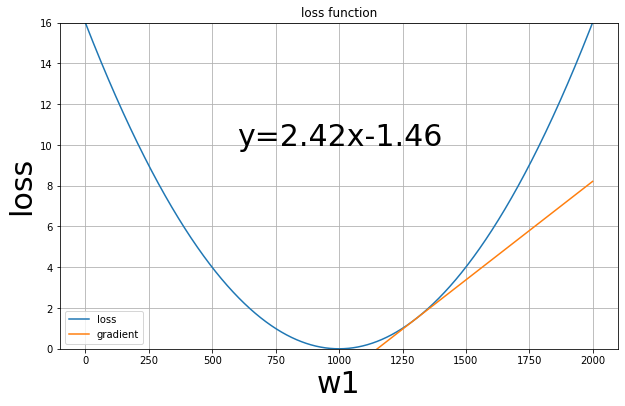

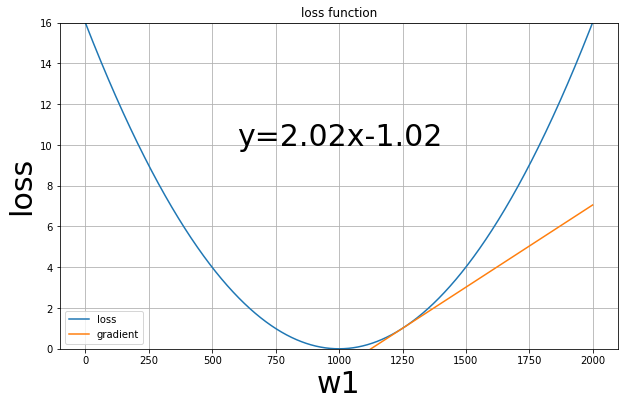

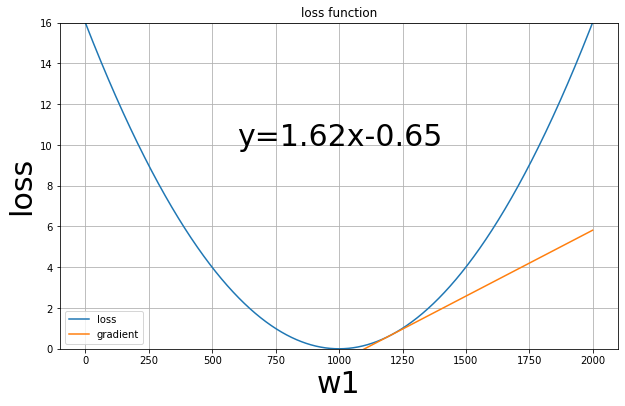

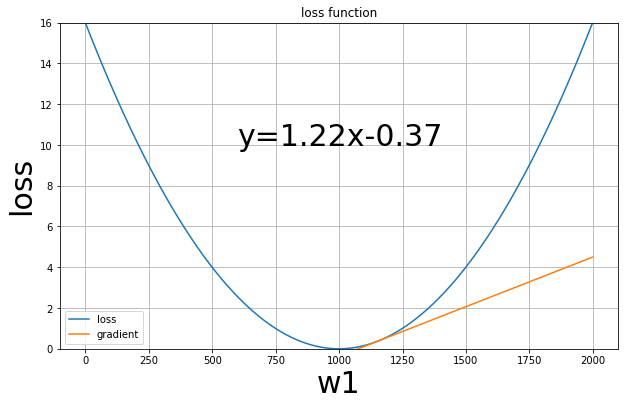

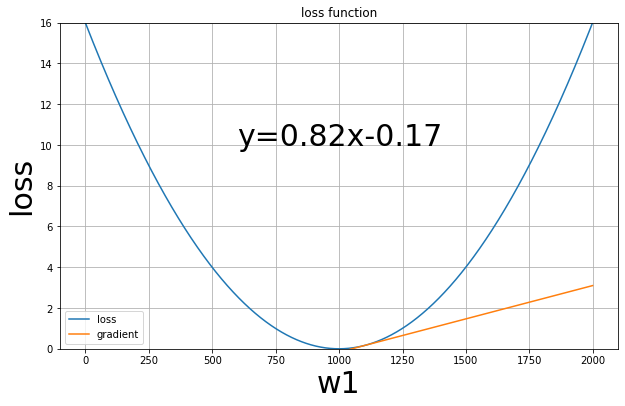

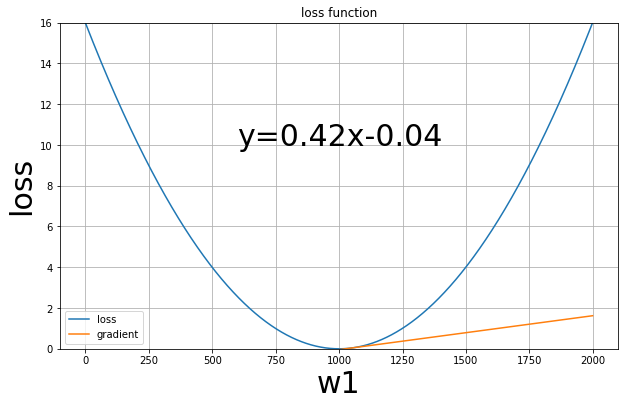

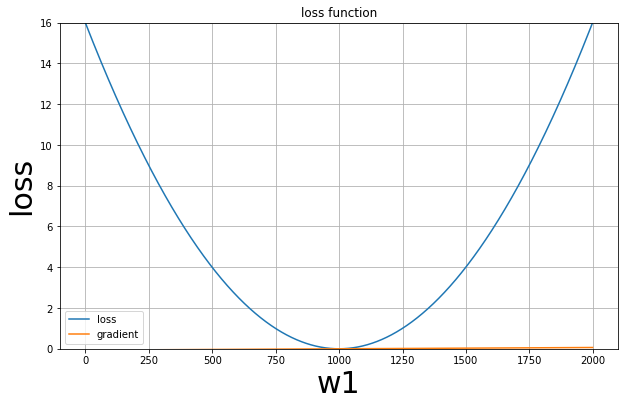

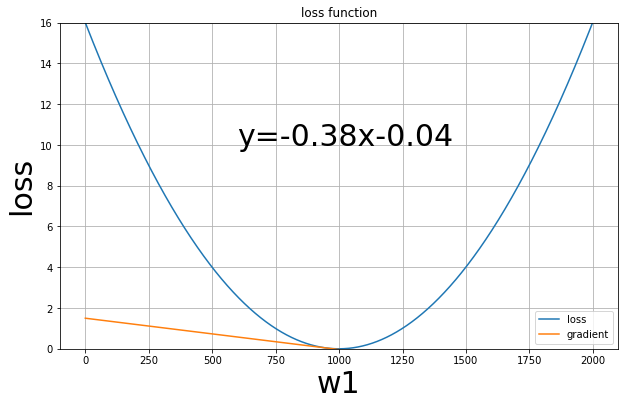

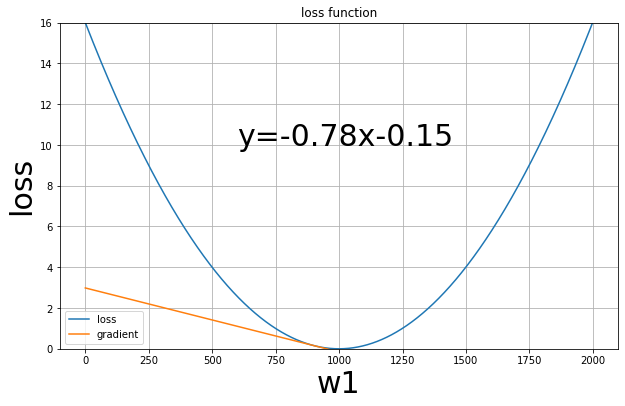

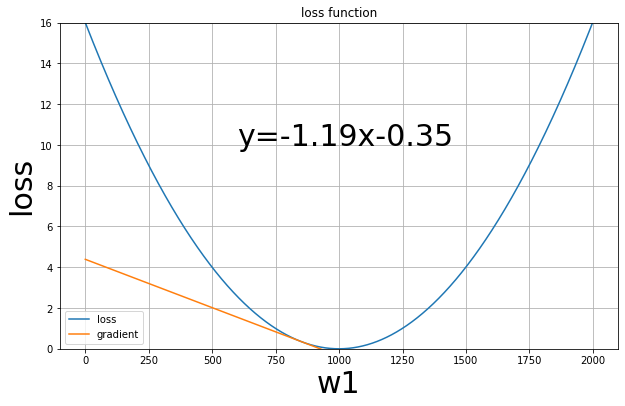

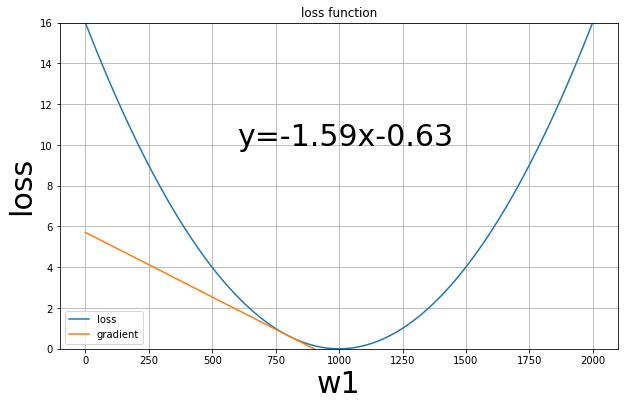

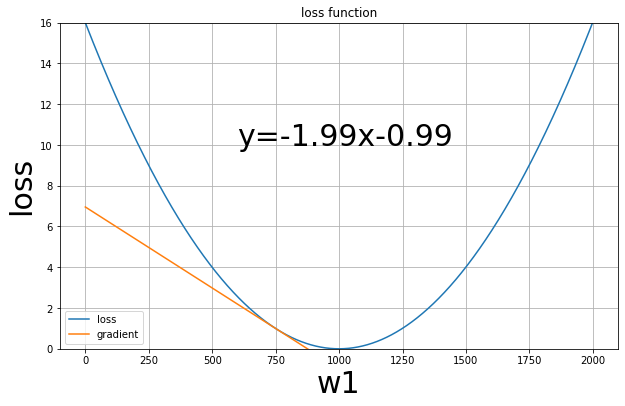

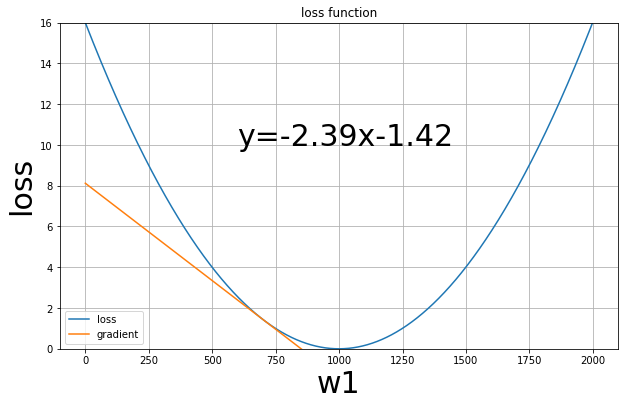

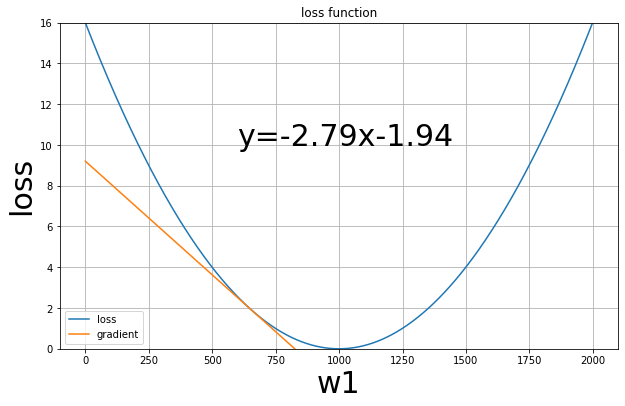

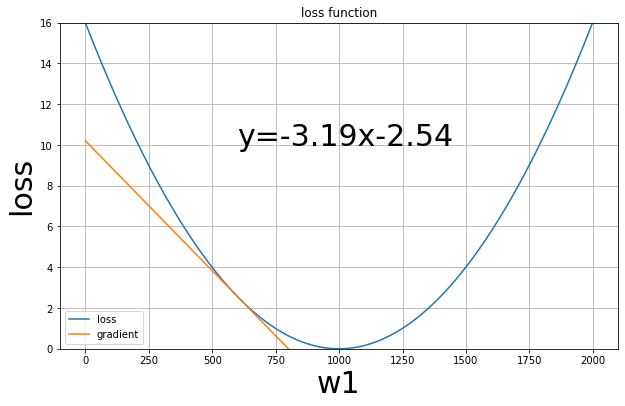

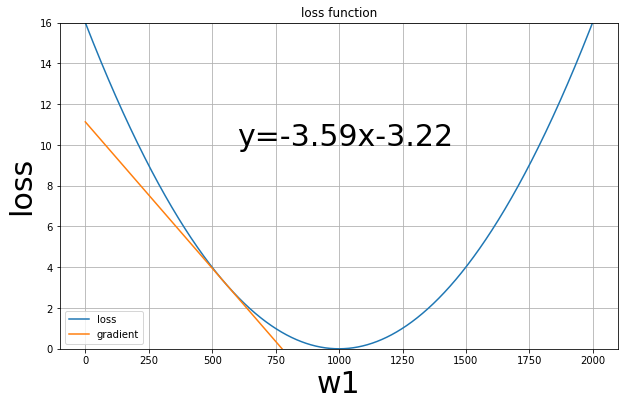

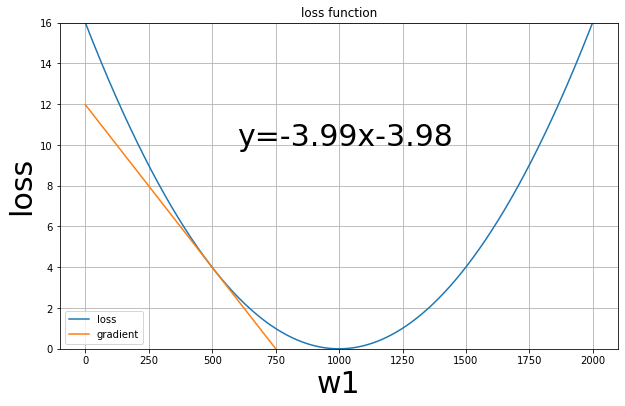

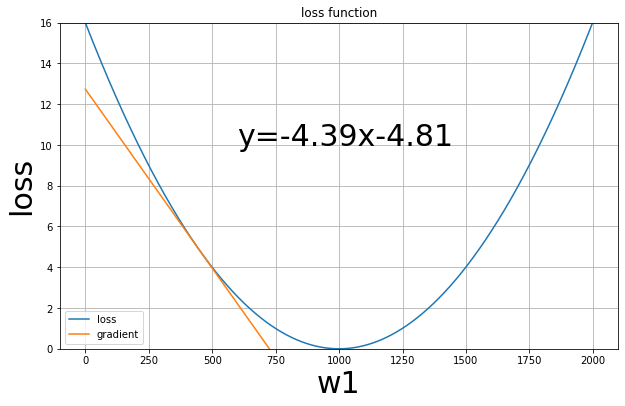

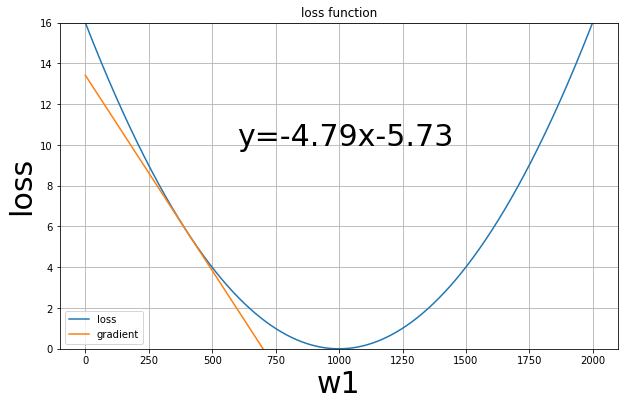

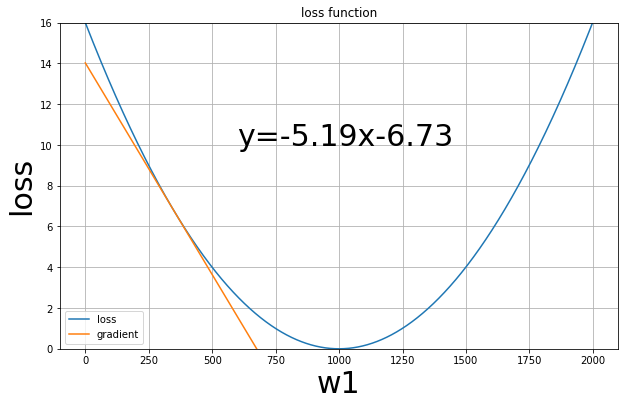

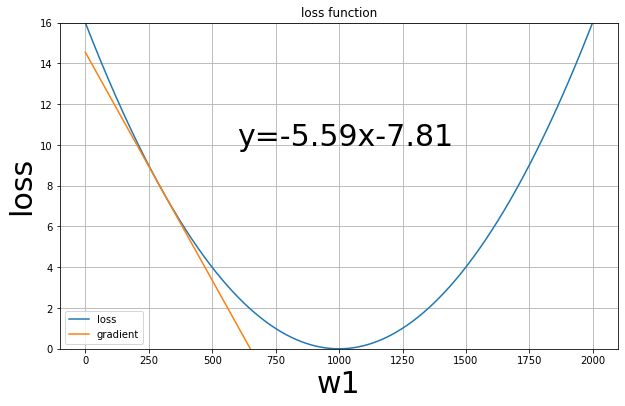

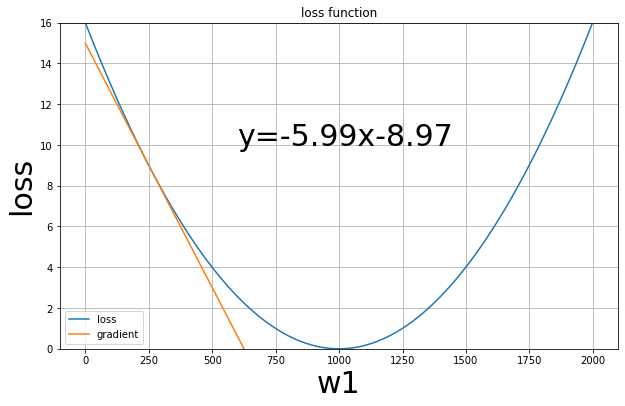

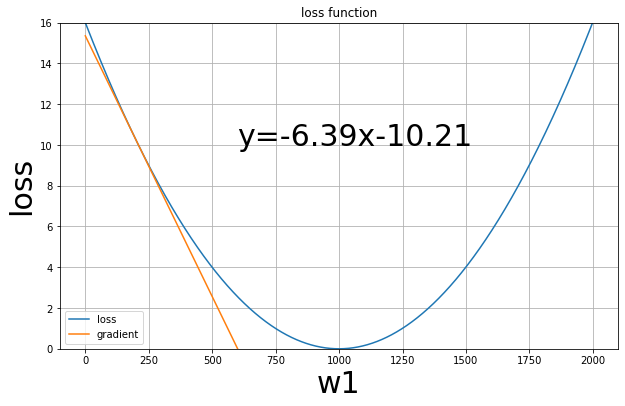

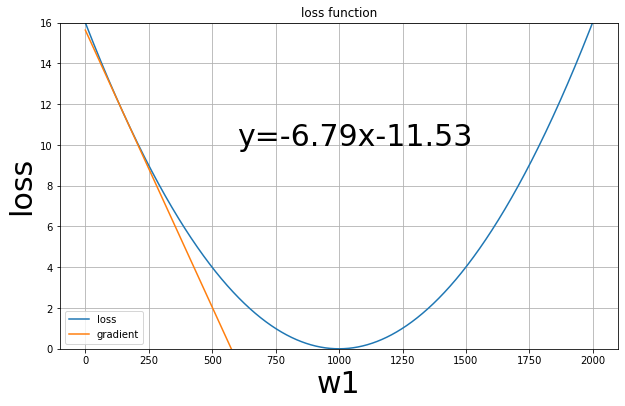

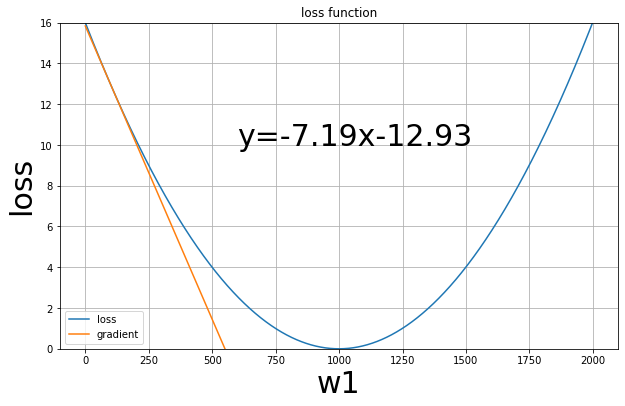

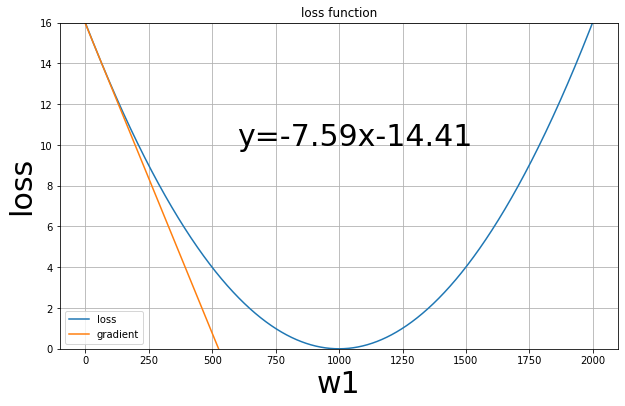

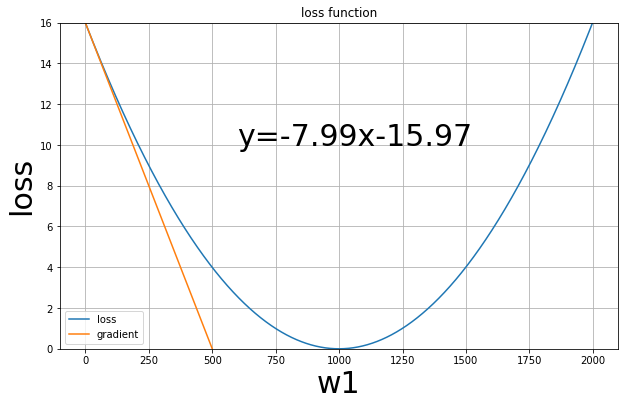

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import time
x = np.linspace(-4,4,2000)
y = x**2

dydx = (y[1:]-y[:-1])/(8/2000)
for i in range(1,2000,50):
    a = round(dydx[i],2)
    b = round((y[i]-dydx[i]*x[i]),2)
    
    plt.figure(figsize=(10,6))
    plt.grid()
    plt.plot(y)
    plt.plot(dydx[i]*x+(y[i]-dydx[i]*x[i]))
    plt.ylim(0,16)
    plt.legend(['loss','gradient'])
    plt.title('loss function')
    if b<0:
        plt.text(600, 10,'y='+str(a)+'x'+str(b), fontsize=30)
    if b>0:
        plt.text(600, 10,'y='+str(a)+'x+'+str(b), fontsize=14)
    plt.xlabel('w1',fontsize=30)
    plt.ylabel('loss',fontsize=30)
    #plt.savefig('trainXOR/'+str(time.time())+'.jpg')
    plt.show()


for i in list(range(1,2000,50))[::-1]:
    a = round(dydx[i],2)
    b = round((y[i]-dydx[i]*x[i]),2)
    
    plt.figure(figsize=(10,6))
    plt.grid()
    plt.plot(y)
    plt.plot(dydx[i]*x+(y[i]-dydx[i]*x[i]))
    plt.ylim(0,16)
    plt.legend(['loss','gradient'])
    plt.title('loss function')
    if b<0:
        plt.text(600, 10,'y='+str(a)+'x'+str(b), fontsize=30)
    if b>0:
        plt.text(600, 10,'y='+str(a)+'x+'+str(b), fontsize=14)
    plt.xlabel('w1',fontsize=30)
    plt.ylabel('loss',fontsize=30)
    #plt.savefig('trainXOR/'+str(time.time())+'.jpg')
    plt.show() 

(-0.5, 529.5, 529.5, -0.5)

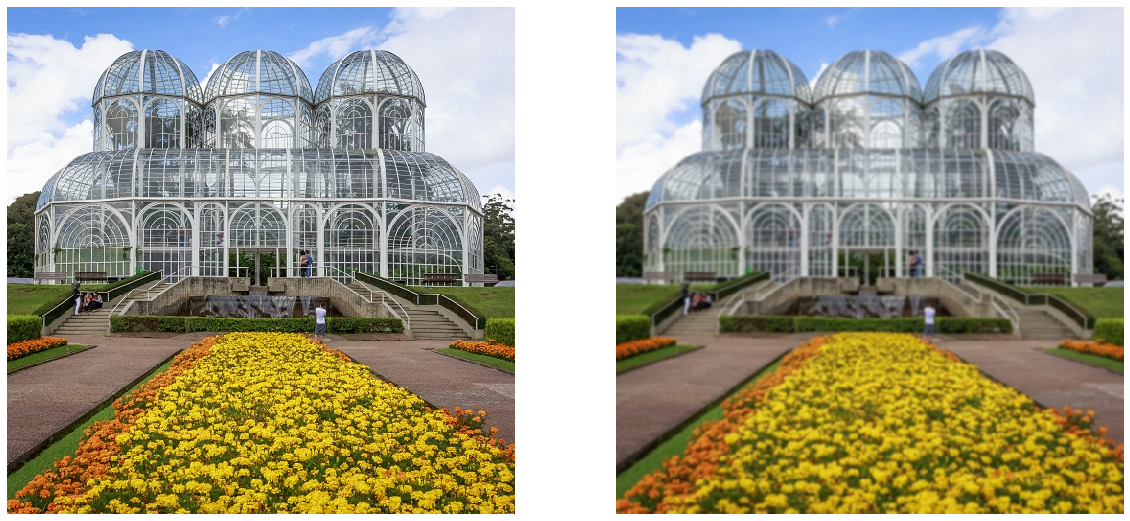

In [55]:
import cv2
import matplotlib.pyplot as plt
im = cv2.imread('test.jpg')

dst = cv2.GaussianBlur(im,(3,3),cv2.BORDER_DEFAULT)
dst = cv2.GaussianBlur(dst,(3,3),cv2.BORDER_DEFAULT)
fig=plt.figure(figsize=(20, 40))

fig.add_subplot(1, 2, 1)
plt.imshow(im[:,:,::-1])
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(dst[:,:,::-1])
plt.axis('off')


(-0.5, 529.5, 529.5, -0.5)

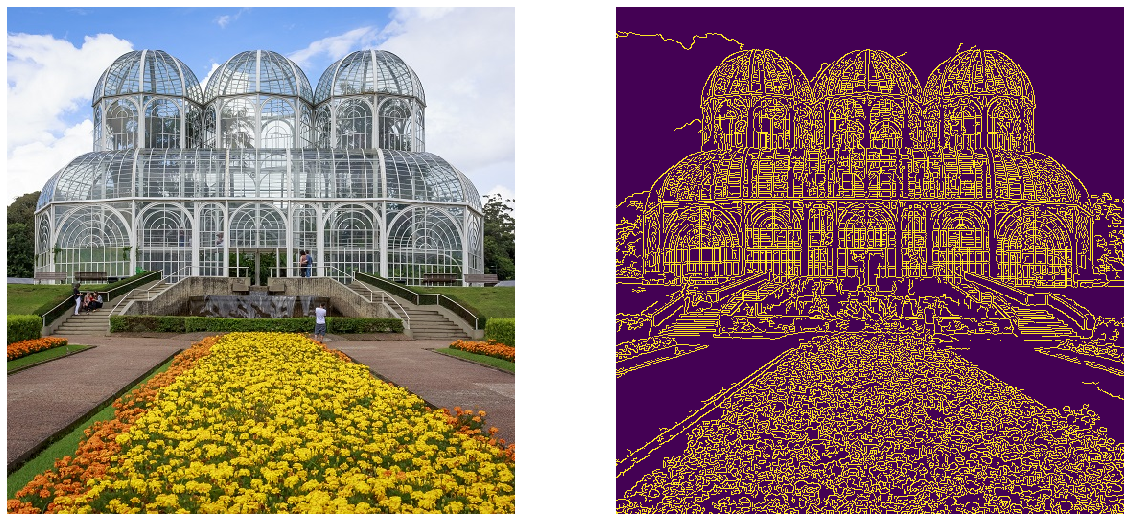

In [61]:
im = cv2.imread('test.jpg')

edges = cv2.Canny(im,100,300)
fig=plt.figure(figsize=(20, 40))

fig.add_subplot(1, 2, 1)
plt.imshow(im[:,:,::-1])
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(edges)
plt.axis('off')




(-0.5, 529.5, 529.5, -0.5)

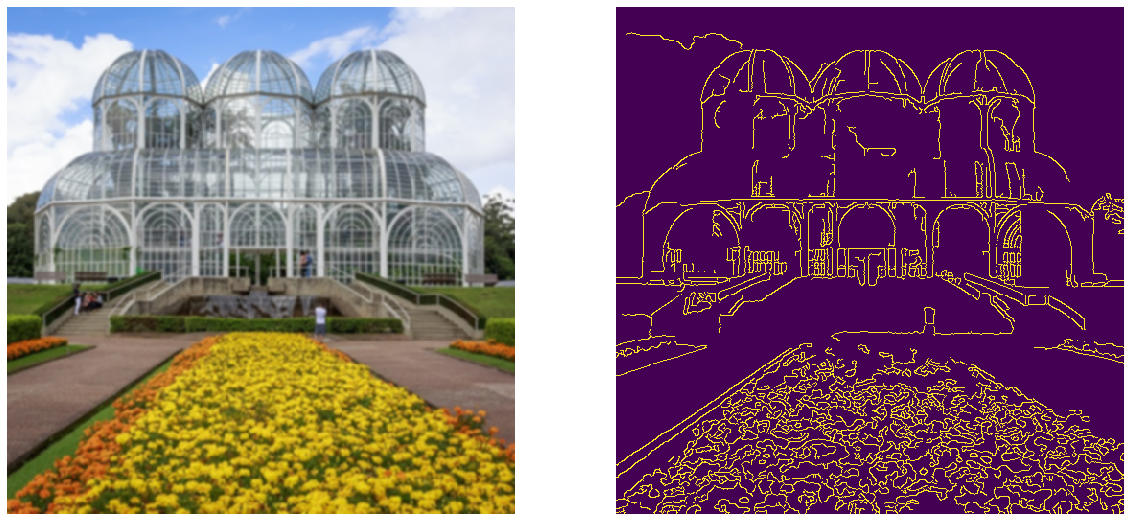

In [57]:
im = cv2.imread('test.jpg')

edges = cv2.Canny(dst,100,300)
fig=plt.figure(figsize=(20, 40))

fig.add_subplot(1, 2, 1)
plt.imshow(dst[:,:,::-1])
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(edges)
plt.axis('off')
